# Liquidity Predictor
Welcome to the eighth lesson! This Jupyter Notebook file is meant to accompany **L08 - Liquidity Predictor.**

| Feature              	| Description                                                   |
|:---------------------	|:--------------------------------------------------------------|
| available_liquidity  	| Cash + available lines of credit (<font color=red><b>target variable</b></font>)(\$ in MM)  |
| sp_score             	| S&P credit rating, converted into continuous values           |
| market_cap           	| Current market capitalization (\$ in MM)                      |
| total_debt           	| Current total debt (\$ in MM)                                 |
| ltm_capex            	| Last twelve months <b>capital expenditures</b> (\$ in MM)     |
| ltm_ebitda           	| Last twelve months <b>adjusted earnings</b> (\$ in MM)        |
| ltm_fcf              	| Last twelve months <b>free cash flow</b> (\$ in MM)           |
| ltm_revenue          	| Last twelve months <b>revenue</b> (\$ in MM)                  |




<p><center>* Harry - I added this metadata table</center></p>


### 1. Liquidity Predictor Introduction

#### The algorithm will evaluate the performance of each competting model, and then we will choose the top performer to make a prediction for client's situation

1. Create **untrained models** for each model class (total of 5) 
    1. Linear Regression\: Lasso, Ridge, Elastic Net 
    2. Decision Trees: Random Forest, Gradient Booster <br />
    
    
2. **Train** each model and **tune** hyperparameters
    1. We will determine the optimal hyperparmatized configuration for each model class before we start comparing
    2. To prevent overfitting, we will **standardize** the feature set and perform **cross fold validation**, where it will repeat the splitting process multiple times **within training data only.** <br />
    
       
3. Use the trained models to **make predictions** based on the inputs from your **testing data set**  <br />
    
    
4. **Compare** the predictions against the actual target values from the testing data set to **score** each model

### 2. Data Exploration

<font color = 'blue'> **EXERCISE 2.1** </font> Import dataset and display the first three rows

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline       
plt.style.use('ggplot')

In [2]:
liquidity_data = pd.read_csv(".\\liquidity_data.csv")
liquidity_data.head(3)

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0


<font color = 'blue'> **EXERCISE 2.2** </font> Display Summary Statistics Exercise

In [3]:
liquidity_data.describe()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
count,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,3884.952199,3.017456,41645.089870,9040.720589,-1200.91799,3455.752891,1772.335973,20420.383638
std,4267.893247,1.851461,74046.522440,12112.161513,2066.29159,5679.466199,4207.345101,39483.422972
min,267.000000,0.000000,4282.810112,0.000000,-15858.00000,-6530.000000,-4888.000000,503.586000
25%,1288.328992,2.000000,10082.091010,2125.297000,-1241.00000,936.200000,232.923000,3791.525000
50%,2395.700000,3.000000,19349.403650,4562.000000,-512.00000,1695.700032,682.110000,8587.166000
75%,4512.458596,4.000000,41154.826240,10478.000000,-190.00000,3706.000000,1788.000000,18816.000000
max,28694.042710,10.000000,777070.706700,87032.000000,-5.04900,69715.000320,53244.000000,487511.000000


### 3. Splitting Data

<font color = 'blue'> **EXERCISE 3.1** </font> Split Target Variable Exercise

- ``target`` = Target Variable (Available Liquidity)
- ``inputs`` = Feature Set

In [4]:
# Import train_test_split() from Scikit Learn's model_selection module
from sklearn.model_selection import train_test_split

# Define a Series named "target" containing only the target variable
target = liquidity_data.available_liquidity           

# Define a DataFrame named "inputs" containing only the input features
inputs = liquidity_data.drop('available_liquidity', axis=1) 

# Split your data and pass the results to a new object named "results"
results = train_test_split(inputs, target, test_size=0.2, random_state=1)

# For each item in results, print the item's dimensions
for item in results:
    print(item.shape)

(641, 7)
(161, 7)
(641,)
(161,)


In [5]:
# Unpack this new list called Results into the individual objects 
input_train, input_test, target_train, target_test = results

print(input_train.shape)   # X_train
print(input_test.shape)    # X_test
print(target_train.shape)  # y_train
print(target_test.shape)   # y_test

(641, 7)
(161, 7)
(641,)
(161,)


### 4. Model Pipelines

Each model class will have simple two step process
1. Standardize the training data to a common scale
2. Apply the model class to the training data with a given random state

<font color = 'blue'> **EXERCISE 4.1** </font>

In [6]:
# Import required functions from Scikit-Learn
from sklearn.linear_model import Lasso, Ridge, ElasticNet   # Linear Models
from sklearn.ensemble import RandomForestRegressor          # Decision Tree Model
from sklearn.ensemble import GradientBoostingRegressor      # Decision Tree Model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# Create pipelines dictionary with model pipelines 
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=1)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=1)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1))
}

# Run this cell to verify that all 5 pipelines are properly defined
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


### 5. Hyperparameter Tuning

1. Different classes of models have different kinds of hyperparameters.
    1. Need to create list of values that you want to test for each hyper parameter
    2. Include test values above and below the default value for each hyper parameter <br />
    
       

2. The key in hyperparmeter grid dictionary **must begin** with the model class **followed by two underscores** and then the specific name of the parameter


<font color = 'blue'> **EXERCISE 5.1** </font> For each model class, determine the list of values that we want to try for selected parameter model

In [7]:
# Create a hyperparameter grid for Lasso
lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5] # Test Values - alpha hyperparameter
}

# Create a hyperparameter grid for Ridge
ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

# Create a hyperparameter grid for Elastic Net
enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create a hyperparameter grid for Random Forest
rf_hyperparameters = {
    'randomforestregressor__n_estimators'  : [100, 200],
    'randomforestregressor__max_features'  : ['auto', 0.3, 0.6]
}

# Create a hyperparameter grid for Gradient Booster
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators'   : [100, 200],
    'gradientboostingregressor__learning_rate'  : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth'      : [1, 3, 5]
}


<font color = 'blue'> **EXERCISE 5.2** </font> Create the hyperparameter_grids dictionary

In [8]:
# Create the hyperparameter_grids dictionary
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet'  : enet_hyperparameters,
    'rf'    : rf_hyperparameters,
    'gb'    : gb_hyperparameters
}

# Run the code below to make sure everything is set up correctly
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')


enet was found, and it is a grid.
gb was found, and it is a grid.
ridge was found, and it is a grid.
rf was found, and it is a grid.
lasso was found, and it is a grid.


### 6. Cross Validation



**Lesson Workspace**

In [9]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# 1) Lasso Pipeline, 2) Hyperparameter configuration, 3) number of folds to perform
untrained_lasso_model = GridSearchCV(pipelines['lasso'],            
                                     hyperparameter_grids['lasso'], 
                                     cv=5 )                         

<font color = 'blue'> **EXERCISE 6.1** </font> Create a dictionary of untrained model

In [10]:
models = {}

# Create a dictionary of untrained model
for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key],hyperparameter_grids[key], cv=5)

models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

<font color = 'blue'> **EXERCISE 6.2** </font> Train the models with the **Testing Data Set**

In [11]:
for key in models.keys():
    models[key].fit(input_train, target_train) # Train each model with Testing Dataset
    print(key, 'is trained and tuned')

lasso is trained and tuned
ridge is trained and tuned
enet is trained and tuned
rf is trained and tuned
gb is trained and tuned


### 7. Selecting a Winning Model

**Lesson Workspace** 



In [12]:
# Import the r-squared and mean absolute error metrics
from sklearn.metrics import r2_score, mean_absolute_error


<font color = 'blue'> **EXERCISE 7.1** </font> 
1. Test each class model by making predictions based on **testing data set** (aka out-of-sample). 
2. Evaluate each class model by using **R squared** and **mean absolute error**, which calculates the average error in the same units as the target variable, which in this case is in millions


```python
# Get the predicted values for Testing Data Set
lasso_preds = models['lasso'].predit(input_test)

# Compare the Actual Values and Predicted Values for Testing Data Set
print('R-Squared:', round(r2_score(target_test, lasso_preds), 3))
print('MAE:', round(mean_absolute_error(target_test, lasso_preds), 3))
```

In [13]:
dicts={}
for key in models:
    preds = models[key].predict(input_test)

    r2 = r2_score(target_test, preds)              # Calc R-squared
    mae = mean_absolute_error(target_test, preds)  # Calc MAE                                    
    dicts[key] = [r2,mae]                          # Add to dictionary
    
    print(key)
    print('R-Squared:', round(r2, 3))
    print('MAE:', round(mae, 3))
    print('---')

# Using Dictionary, determine best performing model
print('Model with Highest R-squared')
print(max(dicts.items(), key = lambda x: x[1][0])) # Model with Highest R-squared
print('---')
print('Model with Lowest MAE')
print(min(dicts.items(), key = lambda x: x[1][1])) # Model with Lowest MAE
print('---')

# Store the name of the best porfolio in a variable
best_portfolio = max(dicts.items(), key = lambda x: x[1][0])[0] #Best on R-squared
print('Best Portfolio is: ',best_portfolio )

lasso
R-Squared: 0.498
MAE: 1710.083
---
ridge
R-Squared: 0.5
MAE: 1708.062
---
enet
R-Squared: 0.501
MAE: 1706.04
---
rf
R-Squared: 0.852
MAE: 934.706
---
gb
R-Squared: 0.855
MAE: 588.249
---
Model with Highest R-squared
('gb', [0.8553619350606756, 588.2485714927299])
---
Model with Lowest MAE
('gb', [0.8553619350606756, 588.2485714927299])
---
Best Portfolio is:  gb


### Comments
The decision tree models (Random forest and Gradient Boost) signficantly outperformed their linear competitors (Lasso, Ridge, and Elastic Net). 

Winner = Gradient Boost emerged as the most accurate model 

<font color = 'blue'> **EXERCISE 7.2** </font>

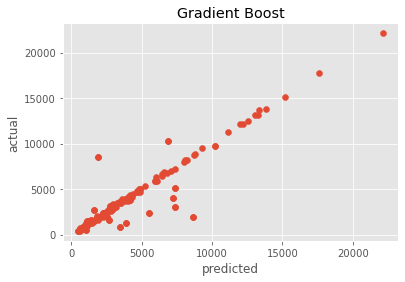

In [14]:
# Make prediction with test data, using the best porfolio
preds = models[best_portfolio].predict(input_test)

# Plot predictions on x axis and actuals on y axis
plt.scatter(preds, target_test)

# Label axes and title
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Gradient Boost')

# and show graph
plt.show()


### 8. Make Client Predictions

Now that we have complete machine learning model trained to predict liquity, we can use it to advise our clients.
- To do, we pass the model a dataframe in the same format as the training data, but without the column containing the target variable and only one line with your client's data

| sp_score | market_cap | total_debt | ltm_capex | ltm_ebitda | ltm_fcf | ltm_revenue |
|----------|------------|------------|-----------|------------|---------|-------------|
|        2 |    54856.2 | 84628      |     -9262 |      21387 |    9488 |      170315 |


In [16]:
# client = pd.read_csv('C:\\Users\\employee_id\\MLE\\data\\liquidity_client.csv')

# Client's data like above
adhoc_input = [2, 54856.2,84628,-9262,21387,9488,170315] 

# Put the Client's data into dataframe
# You don't have to specify the columns
client_data = pd.DataFrame([adhoc_input],
                           columns=['sp_score', 'market_cap', 'total_debt', 
                            'ltm_capex', 'ltm_ebitda', 'ltm_fcf', 'ltm_revenue'
                           ] 
                          )

# Pass the Client's dataframe to trained model to calculate model's prediction
print("Recommend Liquidity amount: ${} in MM"
      .format(round(models[best_portfolio].predict(client_data)[0], 3)) )
                                  

Recommend Liquidity amount: $28662.937 in MM
